<a href="https://colab.research.google.com/github/cchavezlo/UNSA/blob/master/Evaluacion02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import time
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmdb-movies.csv')
#data.info()
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [67]:
data.describe()
data.shape #Filas, columnas

(10866, 21)

En primer lugar, eliminemos las columnas que no usaremos, ya que no afectarán el análisis. No creo que necesitemos: (id, imdb_id, página de inicio, director, lema, palabras clave, descripción general, empresas_de_producción, presupuesto_adj, ingreso_adj, recuento de votos, popularidad)



In [68]:
#Eliminando Columnas que no utilizare en el análisis
columns_drop=['id','imdb_id','homepage','overview', 'production_companies', 'budget_adj', 'revenue_adj']
data.drop(columns_drop, axis =1 , inplace = True)



In [69]:
data.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


Ahora evalúo si no hay Valores nulos y duplicados.


In [70]:
data[data.duplicated()]

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010


In [71]:
#Solo se tiene 1 valor duplicado, elimino uno y me quedo con el otro
data.drop_duplicates(keep='first',inplace=True)

In [72]:
#Evaluo si hay Valores nulos
data.isnull().sum()
#Como se ve, tenemos 76 valores perdidos en 'cast' y asi...

popularity           0
budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
keywords          1493
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [73]:
#Muestro los registros con valores perdidos en el atributo genero
data[data.genres.isnull()]

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,NaN,NaN,100,NaN,10/29/15,21,6.1,2015
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,NaN,90,NaN,10/6/15,13,5.0,2015
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,NaN,NaN,44,NaN,10/3/14,13,6.8,2014
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",NaN,88,NaN,2/27/09,57,7.4,2009
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,NaN,duringcreditsstinger,76,NaN,2/27/09,11,7.0,2009
2370,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,NaN,0,NaN,6/5/10,12,5.8,2010
2376,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,62,NaN,12/25/10,11,7.7,2010
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,NaN,NaN,110,NaN,2/2/01,12,7.2,2001
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,NaN,NaN,96,NaN,8/13/08,11,6.1,2008
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,Inspire a generation.,NaN,220,NaN,7/27/12,12,8.3,2012


In [74]:
#Elimino los registros con valores nulos 
data.dropna(subset = ["genres"], inplace=True)
data.dropna(subset = ["cast"], inplace=True)
data.dropna(subset = ["director"], inplace=True)
data.dropna(subset = ["tagline"], inplace=True)
data.dropna(subset = ["keywords"], inplace=True)
#data[data.genres.isnull()]

In [75]:
#Seria necesario tener en nuestra data peliculas con runtime 0? creo que no tendria sentido
data.query('runtime<=0')

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
334,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,0,Documentary,11/9/15,80,6.5,2015
1289,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,No kids allowed,kidnapping|brutality|violence|teenager|discovery,0,Thriller|Horror|Mystery,10/20/14,16,3.4,2014
1293,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,Original language PORTUGUESE,brazilian|biography|music|drama|documentary,0,Documentary|Drama|Music,10/30/14,14,6.0,2014
6040,0.011798,0,0,The Vatican Exorcisms,Joe Marino,Joe Marino,The public were never meant to know,exorcism,0,Horror|Documentary|Mystery,5/29/13,10,4.7,2013


In [76]:
#Procedo a eliminarlas
data.drop(data[data['runtime']<= 0].index, inplace = True)

In [18]:
#Convierto el runtime a horas 
data.runtime = data.runtime.apply(lambda x: '{:02d}:{:02d}'.format(*divmod(x, 60)))
data.runtime

0        02:04
1        02:00
2        01:59
3        02:16
4        02:17
         ...  
10858    02:06
10860    01:27
10862    02:56
10864    01:20
10865    01:14
Name: runtime, Length: 7296, dtype: object

In [77]:
#Doy formato a la fecha de lanzamiento
data.release_date = pd.to_datetime(data['release_date'])
data.release_date.head(5)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [78]:
#Agregare una columna donde muestre las ganacias por película
data['ganancia']=data.revenue - data.budget
data.ganancia.head(10)

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
5     397950503
6     285603537
7     487380321
8    1082730962
9     678708609
Name: ganancia, dtype: int64

In [79]:
data.shape

(7296, 15)




---


---



# ¿Qué mes se considera “mejor” para estrenar una película o show?


---

RTA: Diciembre pero como muestro en la solución las compañias prefieren estrenar sus películas en el mes de septiembre, siendo estos lanzamientos poco rentables.

In [62]:
#Añado una columna a la data donde sea los meses de estreno por pelicula
data['release_month'] = data['release_date'].dt.month

La mayoria de las películas que obtuvieron mayor ganacia fue cuando se estrenaron en el mes:  12


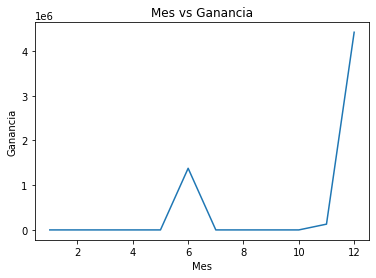

In [76]:
#
rev_sum = data.groupby('release_month').median()['ganancia']
plt.plot(rev_sum.index , rev_sum ); 
plt.title("Mes vs Ganancia");
plt.xlabel('Mes');
plt.ylabel('Ganancia');

print('La mayoria de las películas que obtuvieron mayor ganacia fue cuando se estrenaron en el mes: ', rev_sum.sort_values().index[-1] )

 

El mes que más estrenos de películas tuvo fue:  9
El mes que menos estrenos de películas tuvo fue:  2


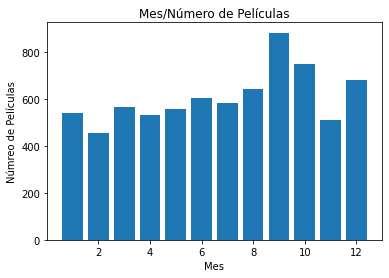

In [79]:
month_count = data['release_month'].value_counts().sort_index()
plt.bar(month_count.index , month_count.values) 
plt.title("Mes/Número de Películas")
plt.xlabel('Mes')
plt.ylabel('Númreo de Películas')

print("El mes que más estrenos de películas tuvo fue: " , data['release_month'].mode()[0] )
print("El mes que menos estrenos de películas tuvo fue: " , data['release_month'].value_counts().sort_values().index.tolist()[0] )

# ¿Cuál es la relación entre runtime y el promedio de votos?


---
RPTA: No tiene ninguna relación


In [33]:
data.runtime

0        124
1        120
2        119
3        136
4        137
        ... 
10858    126
10860     87
10862    176
10864     80
10865     74
Name: runtime, Length: 7296, dtype: int64

runtime
4      7.80
5      7.95
6      7.95
7      7.70
9      7.00
       ... 
470    6.60
500    7.00
540    7.80
550    7.60
705    8.00
Name: vote_average, Length: 197, dtype: float64


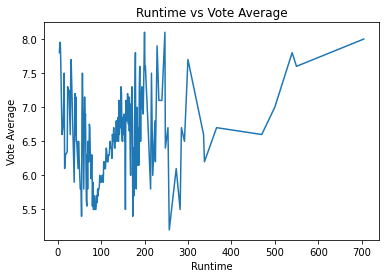

In [34]:
#
rev_sum = data.groupby('runtime').median()['vote_average']
plt.plot(rev_sum.index , rev_sum ); 
plt.title("Runtime vs Vote Average");
plt.xlabel('Runtime');
plt.ylabel('Vote Average');

print(rev_sum )

 

In [35]:
data['runtime'] = pd.to_datetime(data['runtime'], infer_datetime_format=True)
data['runtime'].mean()

Timestamp('1970-01-01 00:00:00.000000104')

#  ¿Hay géneros específicos asociados a mayores ingresos?


---



In [112]:
#Muestro los generos y  el total de peliculas 
genres_count = pd.Series(data['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              3221
Comedy             2620
Thriller           2193
Action             1796
Horror             1191
Romance            1167
Adventure          1112
Crime              1075
Science Fiction     937
Family              769
Fantasy             660
Mystery             616
Animation           370
Music               255
History             222
Documentary         201
War                 190
Western             134
TV Movie             64
Foreign              48
dtype: int64

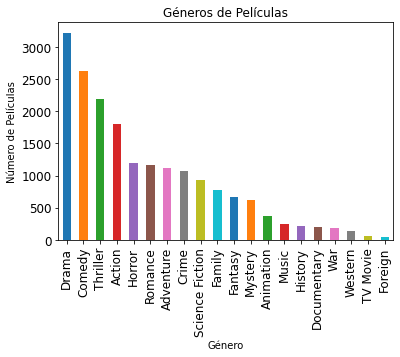

In [111]:
cmap = plt.cm.tab10
colors = cmap(np.arange(len(data)) % cmap.N)
diagram = genres_count.plot.bar(fontsize = 12,color=colors)
plt.title('Géneros de Películas')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.show();

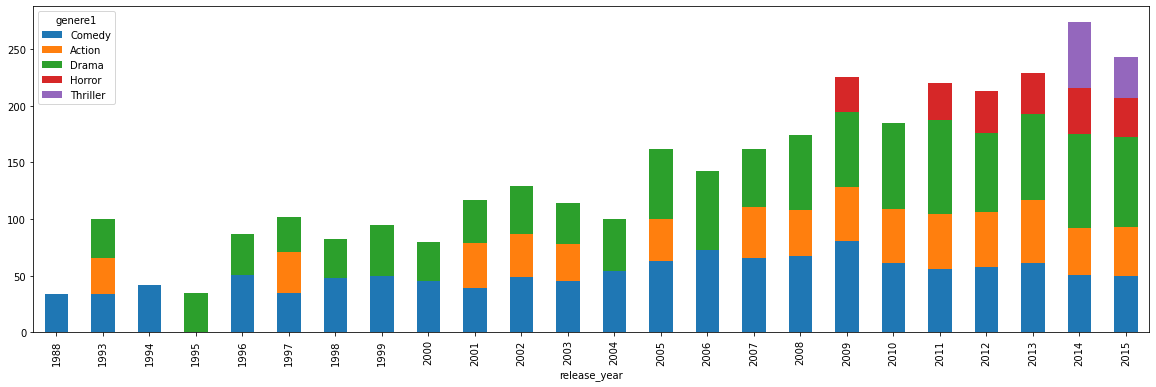

In [80]:
data[['genere1']] = data.genres.str.split("|",expand=True).iloc[:,:1]
data.genere1
#data = data.groupby(['genere1']).
data_filtro = data.groupby(['release_year' , 'genere1']).count()['popularity'][data.groupby(['release_year' , 'genere1']).count()['popularity']>30]
data_filtro.unstack().plot(kind='bar', stacked=True  , figsize=(20,6));

# ¿Qué año tiene el mayor estreno de películas?


---

RPTA: El año:  2014  con  393  películas estrenadas.

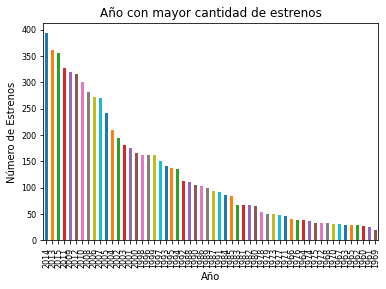

RPTA: El año:  2014  con  393  películas estrenadas.


In [107]:
year_estreno_count = pd.Series(data['release_year']).value_counts(ascending = False)
cmap = plt.cm.tab10
colors = cmap(np.arange(len(data)) % cmap.N)
diagram = year_estreno_count.plot.bar(fontsize = 8,color=colors)
plt.title('Año con mayor cantidad de estrenos')
plt.xlabel('Año')
plt.ylabel('Número de Estrenos')
plt.show();
print("RPTA: El año: ", year_estreno_count.index[0], " con ",  year_estreno_count.get(year_estreno_count.index[0]) , " películas estrenadas." )

# ¿Cuántas películas se estrenan año tras años?

---
RPTA: Líneas abajo


1969     20
1961     26
1960     28
1962     29
1965     29
1963     29
1967     31
1970     32
1968     33
1972     34
1975     34
1974     37
1964     39
1976     39
1966     40
1971     46
1977     48
1973     50
1979     51
1978     53
1980     66
1982     67
1981     67
1983     68
1985     84
1984     87
1991     92
1987     93
1989     99
1986    104
1990    105
1988    110
1992    112
1994    136
1995    137
1993    141
1997    150
1999    162
1996    162
1998    163
2000    165
2001    175
2003    181
2002    195
2004    210
2005    241
2007    270
2006    272
2008    281
2010    300
2012    316
2009    320
2011    327
2015    355
2013    362
2014    393
Name: release_year, dtype: int64


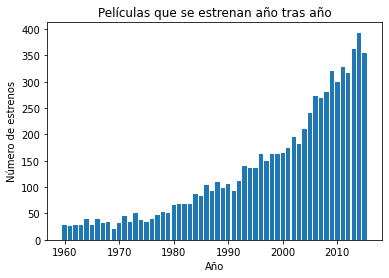

In [118]:
year_estreno_count = pd.Series(data['release_year']).value_counts(ascending = True)
plt.bar(year_estreno_count.index , year_estreno_count.values) 
plt.title("Películas que se estrenan año tras año")
plt.xlabel('Año')
plt.ylabel('Número de estrenos')
print(year_estreno_count)


# ¿Películas con el presupuesto más alto y más bajo?

---



In [119]:
data

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,ganancia,genere1
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Action
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225,Action
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,cold war|russian|new england,126,Comedy|War,2066-05-25,11,5.5,1966,0,Comedy
10860,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,87,Comedy,2066-05-20,13,7.0,1966,0,Comedy
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,176,Action|Adventure|Drama,2066-12-21,20,5.7,1966,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,80,Action|Comedy,2066-11-02,22,5.4,1966,0,Action
